## 导入所需要的包

### 数据分析包

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats

e:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 绘图工具包

In [2]:
# 显示全部dataframe
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，中文显示
plt.rcParams['axes.unicode_minus'] = False   # 坐标轴负数的负号显示
import seaborn as sns
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import graphviz
import math

### 特征选择+机器学习模型

In [3]:
import eli5
from eli5.sklearn import PermutationImportance
import shap
import missingno as msno
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
import category_encoders as ce
from lightgbm import LGBMRegressor,plot_importance,plot_metric,plot_tree
from xgboost import XGBRegressor
import xgboost as xgb
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (MinMaxScaler,OneHotEncoder,
                                   RobustScaler,LabelEncoder)

from sklearn.model_selection import (train_test_split,cross_val_score,
                                     GridSearchCV,KFold,learning_curve,
                                     cross_validate,RandomizedSearchCV,
                                    TimeSeriesSplit)

from feature_engine.encoding import (MeanEncoder,CountFrequencyEncoder,
                                    OneHotEncoder,OrdinalEncoder)
from sklearn.feature_selection import f_classif,chi2,SelectKBest,VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_classif as MIC 
from sklearn.decomposition import PCA
from scipy.stats import boxcox 
from scipy.special import inv_boxcox 

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import lightgbm as lgb
from eli5.sklearn import PermutationImportance
from lightgbm.plotting import create_tree_digraph,plot_split_value_histogram
import shap
import os
from warnings import filterwarnings
filterwarnings("ignore")

### 导入数据并查看dataframe结构

In [4]:
energy_df=pd.read_csv("energy_dataset.csv")
weather_df=pd.read_csv("weather_features.csv")

In [5]:
weather_df #天气数据17个字段

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
energy_df #发电价格相关数据 29个字段

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96,NaN,3253,30619,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51,NaN,3353,29932,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36,NaN,3404,27903,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29,NaN,3273,25450,25801.0,63.93,69.89


In [7]:
print(weather_df.shape,energy_df.shape)

(178396, 17) (35064, 29)


西班牙五座城市的天气数据条目数。马德里最多，瓦伦西亚最少，但是差别不大。

In [8]:
weather_df.city_name.value_counts()

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

In [9]:
print('电能价格数据日期范围：',energy_df.time.min(),energy_df.time.max())
print('天气情况数据日期范围',weather_df.dt_iso.min(),weather_df.dt_iso.max())

电能价格数据日期范围： 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00
天气情况数据日期范围 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00


### 查看数据的缺失值情况、零值情况并且进行处理

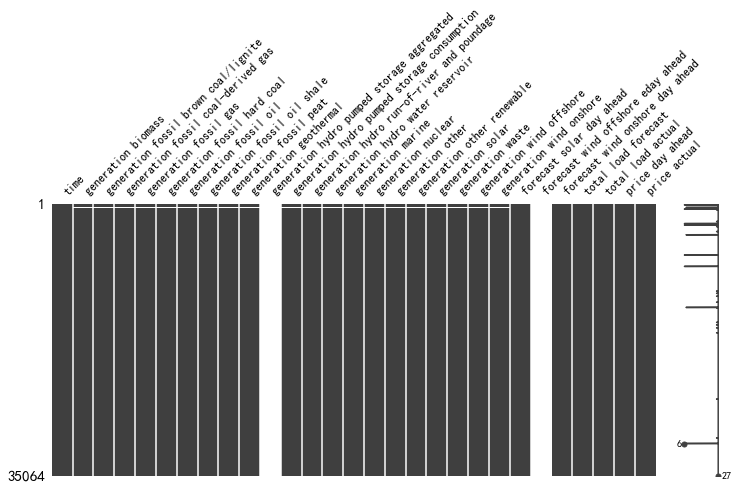

In [10]:
msno.matrix(df=energy_df,figsize=(12,5),fontsize=12);

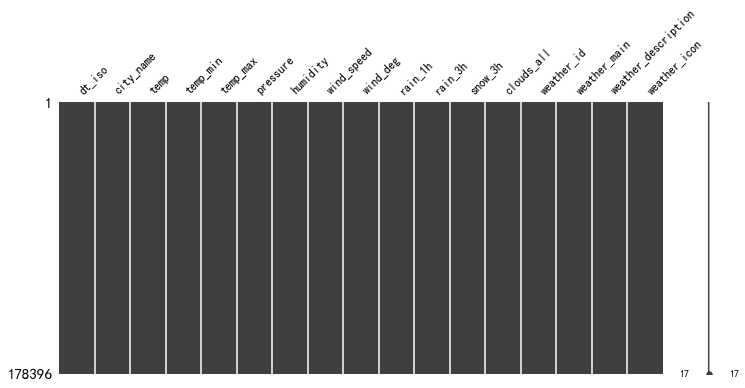

In [11]:
msno.matrix(df=weather_df,figsize=(12,5),fontsize=12);

In [12]:
#定义一个归纳汇总DataFrame缺失值的函数
def miss_frame(data):
    frame=pd.DataFrame()
    frame["missing_num"]=data.isnull().sum()
    frame["missing_rate"]=data.isnull().sum()/len(data)
    frame=frame.loc[frame["missing_rate"]>0].sort_values(by="missing_rate",
                                                         ascending=False)
    frame["missing_rate>0.05"]=frame["missing_rate"].map(lambda x:1 if x>=0.05 else 0)
    return frame

miss_frame(energy_df)

,missing_num,missing_rate,missing_rate>0.05
generation hydro pumped storage aggregated,35064,1.000000,1
forecast wind offshore eday ahead,35064,1.000000,1
total load actual,36,0.001027,0
generation waste,19,0.000542,0
generation marine,19,0.000542,0
generation hydro pumped storage consumption,19,0.000542,0
generation biomass,19,0.000542,0
generation fossil oil,19,0.000542,0
generation hydro run-of-river and poundage,19,0.000542,0
generation fossil peat,18,0.000513,0


In [13]:
miss_frame(weather_df)

,missing_num,missing_rate,missing_rate>0.05


#### 诊断分析相关函数

In [14]:
def diagnostic_plots(df, variable):
    ''' 
    该函数用于诊断分析。主要分三部分：柱状密度图、QQ图以及箱线图
    :param df: 需要诊断分析的数据
    :param variable: 需要诊断分析的数据字段名
    '''
    plt.figure(figsize=(17, 5))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable])
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable])
    plt.title('Boxplot')
    
    plt.show()

#### 绘制时间序列函数

In [15]:
def plot_timeseries(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

#### 查看天气数据的统计量情况

In [16]:
energy_zero=energy_df.eq(0).sum().to_frame(name="Zero Values Counts")
energy_zero[energy_zero.loc[:,'Zero Values Counts']>10000]

,Zero Values Counts
generation fossil brown coal/lignite,10517
generation fossil coal-derived gas,35046
generation fossil oil shale,35046
generation fossil peat,35046
generation geothermal,35046
generation hydro pumped storage consumption,12607
generation marine,35045
generation wind offshore,35046


In [17]:
energy_zero

,Zero Values Counts
time,0
generation biomass,4
generation fossil brown coal/lignite,10517
generation fossil coal-derived gas,35046
generation fossil gas,1
generation fossil hard coal,3
generation fossil oil,3
generation fossil oil shale,35046
generation fossil peat,35046
generation geothermal,35046


In [18]:
energy_df.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation marine",
                  "generation wind offshore",
                  "generation hydro pumped storage aggregated",
                    "forecast wind offshore eday ahead"],
                 axis=1,
                 inplace=True)

In [19]:
miss_frame(energy_df)


,missing_num,missing_rate,missing_rate>0.05
total load actual,36,0.001027,0
generation biomass,19,0.000542,0
generation fossil oil,19,0.000542,0
generation hydro pumped storage consumption,19,0.000542,0
generation hydro run-of-river and poundage,19,0.000542,0
generation waste,19,0.000542,0
generation fossil brown coal/lignite,18,0.000513,0
generation fossil gas,18,0.000513,0
generation fossil hard coal,18,0.000513,0
generation hydro water reservoir,18,0.000513,0


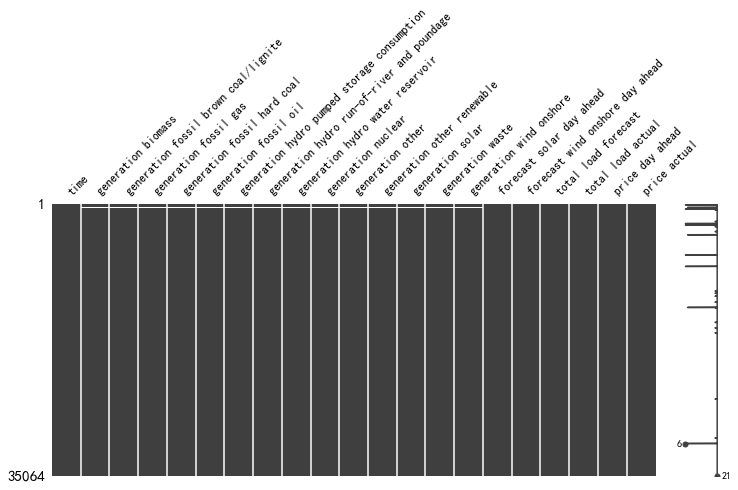

In [20]:
msno.matrix(df=energy_df,figsize=(12,5),fontsize=12);

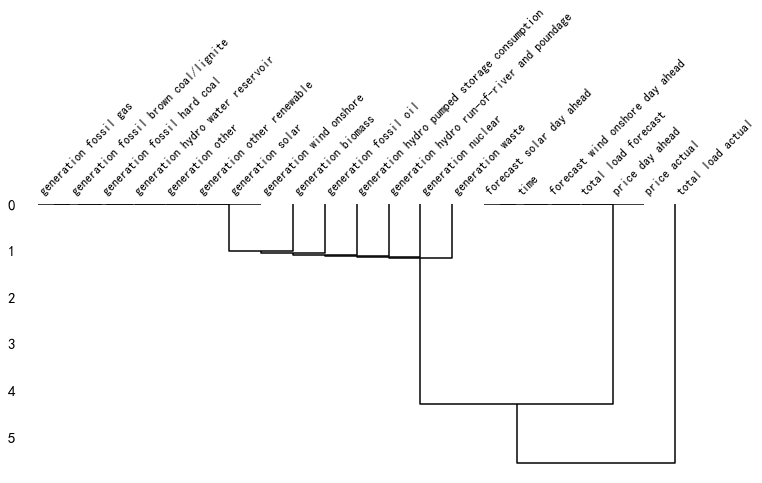

In [21]:
msno.dendrogram(df=energy_df,figsize=(12,5),fontsize=12);

#### 查看此时能源数据的缺失值与重复值情况

In [22]:
print('有{}个数据缺失值或未知值'
      .format(energy_df.isnull().values.sum()))

temp_energy = energy_df.duplicated(keep='first').sum()

print('有{}个数据重复值'
      .format(temp_energy))

有292个数据缺失值或未知值
有0个数据重复值


In [23]:
print('有{}个数据缺失值或未知值'
      .format(weather_df.isnull().values.sum()))

temp_weather = weather_df.duplicated(keep='first').sum()

print('有{}个数据重复值'
      .format(temp_weather))

有0个数据缺失值或未知值
有21个数据重复值


In [24]:
print('对于能源数据有{}个样本。'.format(energy_df.shape[0]))

cities = weather_df['city_name'].unique()
grouped_weather = weather_df.groupby('city_name')

for city in cities:
    print('对于天气数据的样本数为{}'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          '对应城市为{}.'.format(city))

对于能源数据有35064个样本。
对于天气数据的样本数为35145 对应城市为Valencia.
对于天气数据的样本数为36267 对应城市为Madrid.
对于天气数据的样本数为35951 对应城市为Bilbao.
对于天气数据的样本数为35476 对应城市为 Barcelona.
对于天气数据的样本数为35557 对应城市为Seville.


#### 对能源数据进行填补

In [25]:
missing_energy=energy_df[energy_df.isna().any(axis=1)]
missing_energy.head()

miss_cols=miss_frame(missing_energy).index.to_list()
miss_index=missing_energy.index.to_list()

energy_new=energy_df.copy()

energy_new[miss_cols]=energy_new[miss_cols].interpolate(method='linear', limit_direction='forward', axis=0)
energy_new.iloc[miss_index].head()

energy_time = energy_df.set_index('time')

In [26]:
print('有{}个数据缺失值或未知值'
      .format(energy_new.isnull().values.sum()))

temp_energy = energy_new.duplicated(keep='first').sum()

print('有{}个数据重复值'
      .format(temp_energy))

有0个数据缺失值或未知值
有0个数据重复值


#### 对能源数据进行数据预处理（boxcox变换与对数变换）

In [27]:
energy_new['generation fossil gas']=boxcox(energy_new['generation fossil gas']+1,lmbda=0.2)
energy_new['generation fossil hard coal']=boxcox(energy_new['generation fossil hard coal']+1,lmbda=0.2)
energy_new['generation hydro run-of-river and poundage']=boxcox(energy_new['generation hydro run-of-river and poundage']+1,lmbda=0.2)
energy_new['generation hydro water reservoir']=boxcox(energy_new['generation hydro water reservoir']+1,lmbda=0.2)
energy_new['generation waste']=boxcox(energy_new['generation waste']+1,lmbda=0.2)
energy_new['generation wind onshore']=boxcox(energy_new['generation wind onshore']+1,lmbda=0.2)
energy_new['forecast wind onshore day ahead']=boxcox(energy_new['forecast wind onshore day ahead']+1,lmbda=0.2)

In [28]:
energy_new['generation fossil brown coal/lignite']=np.log(energy_new['generation fossil brown coal/lignite']+1)
energy_new['generation hydro pumped storage consumption']=np.log(energy_new['generation hydro pumped storage consumption']+1)
energy_new['generation solar']=np.log(energy_new['generation solar']+1)
energy_new['forecast solar day ahead']=np.log(energy_new['forecast solar day ahead']+1)

#### 处理天气当中的异常值

In [29]:
weather_df.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


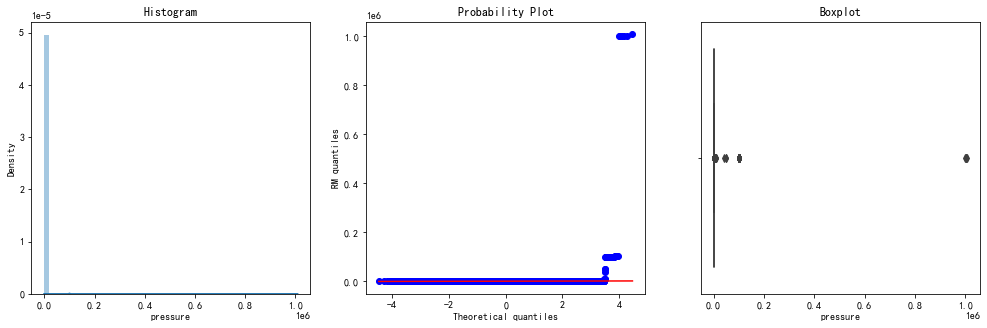

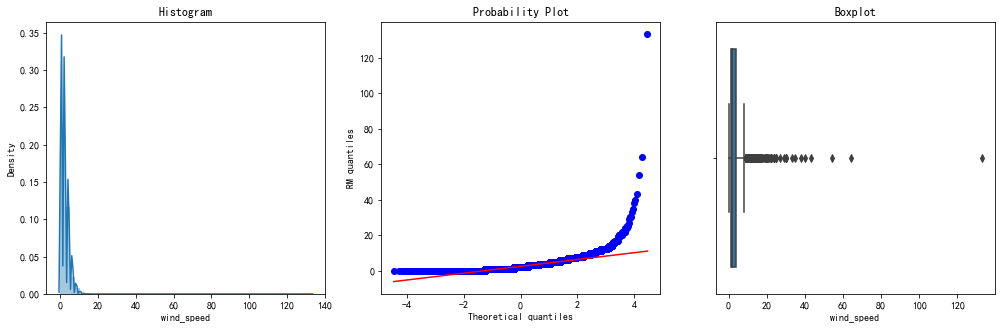

In [30]:
diagnostic_plots(weather_df,'pressure')  #发现气压的异常值
diagnostic_plots(weather_df,'wind_speed')  #发现风速的异常值

In [31]:
#气压大于1050或气压小于930都不太正常，故直接替换为nan，后续采用插值方法填补数据
weather_df.loc[weather_df.pressure > 1050, 'pressure'] = np.nan
weather_df.loc[weather_df.pressure < 930, 'pressure'] = np.nan
#风速大于30也不太合理，因此也替换为nan，后续采用插值方法填补数据
weather_df.loc[weather_df.wind_speed > 30, 'wind_speed'] = np.nan

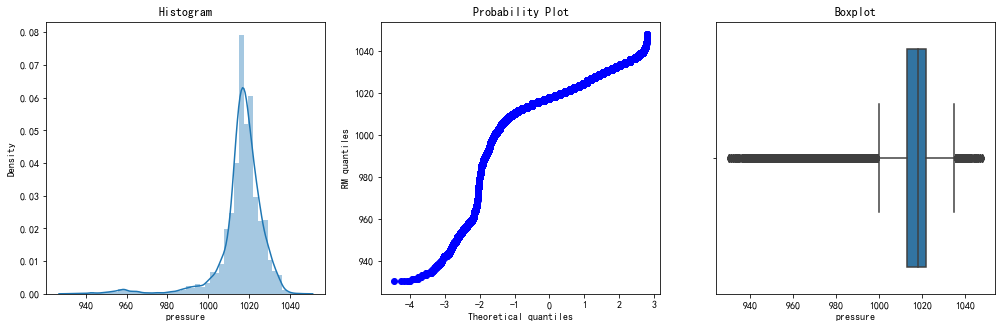

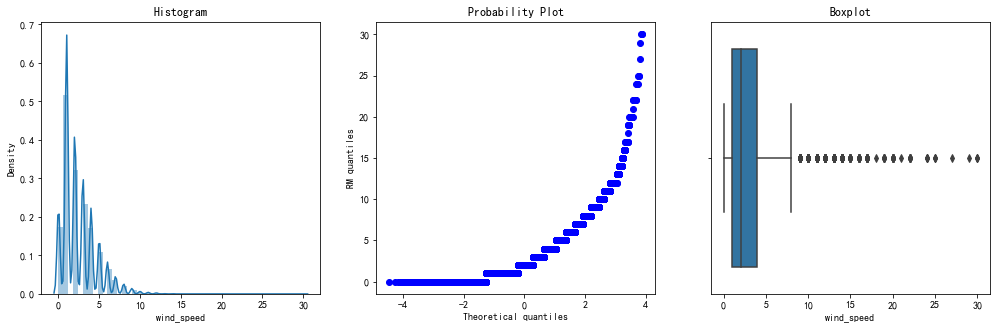

In [32]:
#处理完后看一下诊断分析结果
diagnostic_plots(weather_df,'pressure') 
diagnostic_plots(weather_df,'wind_speed')

In [33]:
#用线性插值方法重新填补
weather_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

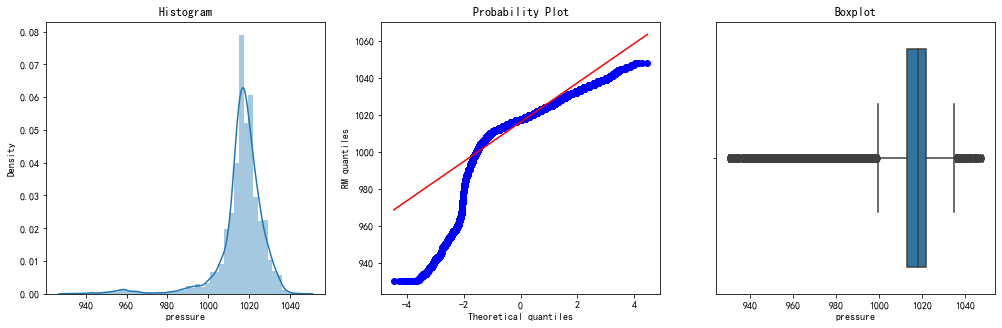

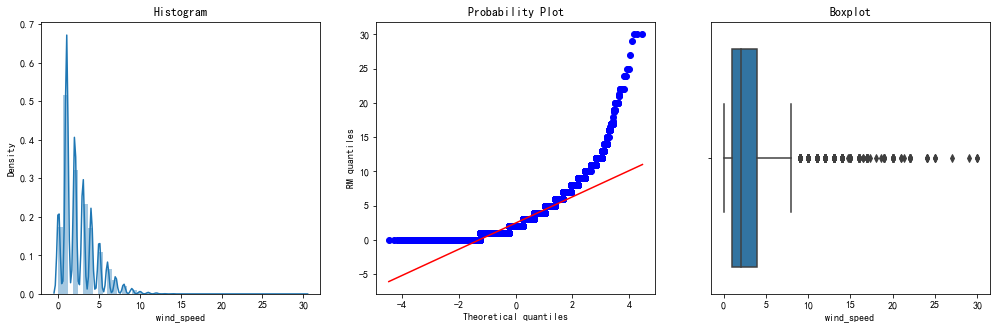

In [34]:
#处理完后看一下诊断分析结果。此时结果稍许正常
diagnostic_plots(weather_df,'pressure') 
diagnostic_plots(weather_df,'wind_speed')

查看各个城市的天气数据条目数情况，尽可能做到条目数与能源价格条目数匹配

In [35]:
weather_bar=weather_df.query("city_name == ' Barcelona'")
weather_bil=weather_df.query("city_name == 'Bilbao'")
weather_mad=weather_df.query("city_name == 'Madrid'")
weather_sev=weather_df.query("city_name == 'Seville'")
weather_val=weather_df.query("city_name == 'Valencia'")

print(weather_bar.shape,energy_df.shape)
print(weather_bil.shape,energy_df.shape)
print(weather_mad.shape,energy_df.shape)
print(weather_sev.shape,energy_df.shape)
print(weather_val.shape,energy_df.shape)

(35476, 17) (35064, 21)
(35951, 17) (35064, 21)
(36267, 17) (35064, 21)
(35557, 17) (35064, 21)
(35145, 17) (35064, 21)


#### 将原来字段中的时间字段改名

In [36]:
weather_df=weather_df.rename({"dt_iso":"time"},axis=1)
weather_bar=weather_bar.rename({"dt_iso":"time"},axis=1)
weather_bil=weather_bil.rename({"dt_iso":"time"},axis=1)
weather_mad=weather_mad.rename({"dt_iso":"time"},axis=1)
weather_sev=weather_sev.rename({"dt_iso":"time"},axis=1)
weather_val=weather_val.rename({"dt_iso":"time"},axis=1)

发现城市天气数据的条目数基本上多于能源价格条目数。故需要进一步处理使他们在条目数上匹配

In [37]:
weather_bar=weather_bar.drop_duplicates(subset="time",keep="first")
weather_bil=weather_bil.drop_duplicates(subset="time",keep="first")
weather_mad=weather_mad.drop_duplicates(subset="time",keep="first")
weather_sev=weather_sev.drop_duplicates(subset="time",keep="first")
weather_val=weather_val.drop_duplicates(subset="time",keep="first")  #发现不同城市的气温数据中存在重复时间值，故需要删去重复值

#删去重复值后打印一下，观察结果
print(weather_bar.shape,energy_df.shape)
print(weather_bil.shape,energy_df.shape)
print(weather_mad.shape,energy_df.shape)
print(weather_sev.shape,energy_df.shape)
print(weather_val.shape,energy_df.shape)

(35064, 17) (35064, 21)
(35064, 17) (35064, 21)
(35064, 17) (35064, 21)
(35064, 17) (35064, 21)
(35064, 17) (35064, 21)


In [38]:
bar_df=pd.merge(energy_new,weather_bar,on="time")
bil_df=pd.merge(energy_new,weather_bil,on="time")
mad_df=pd.merge(energy_new,weather_mad,on="time")
sev_df=pd.merge(energy_new,weather_sev,on="time")
val_df=pd.merge(energy_new,weather_val,on="time")
#打印一下维度结果
print(bar_df.shape,bil_df.shape,mad_df.shape,sev_df.shape,val_df.shape)

(35064, 37) (35064, 37) (35064, 37) (35064, 37) (35064, 37)


In [39]:
bar_df['pd_time'] = bar_df['time']
bar_df['pd_time'] = pd.to_datetime(bar_df['pd_time'], utc=True, infer_datetime_format=True)
bar_df = bar_df.set_index('pd_time')

bil_df['pd_time'] = bil_df['time']
bil_df['pd_time'] = pd.to_datetime(bil_df['pd_time'], utc=True, infer_datetime_format=True)
bil_df = bil_df.set_index('pd_time')

mad_df['pd_time'] = mad_df['time']
mad_df['pd_time'] = pd.to_datetime(mad_df['pd_time'], utc=True, infer_datetime_format=True)
mad_df = mad_df.set_index('pd_time')

sev_df['pd_time'] = sev_df['time']
sev_df['pd_time'] = pd.to_datetime(sev_df['pd_time'], utc=True, infer_datetime_format=True)
sev_df = sev_df.set_index('pd_time')

val_df['pd_time'] = val_df['time']
val_df['pd_time'] = pd.to_datetime(val_df['pd_time'], utc=True, infer_datetime_format=True)
val_df = val_df.set_index('pd_time')

#### 基于人口和气温权重进行天气变量加权

In [40]:
total_pop = 3400000 + 1610000 + 800000 + 1300000 + 433000

weight_Madrid = 3400000 / total_pop
weight_Barcelona = 1610000 / total_pop
weight_Valencia = 800000 / total_pop
weight_Seville = 1300000 / total_pop
weight_Bilbao = 433000 / total_pop

#### 合并各城市的每小时天气数据与能源价格数据

In [41]:
weather_df_time = weather_df.set_index('time')
weather_df_time

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028.0,54,3.0,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029.0,62,3.0,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028.0,58,4.0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [42]:
weather_df_time = weather_df_time.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')
weather_df_time = weather_df_time.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)

##### 将五个城市的数据全部进行并入

In [43]:
df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather_df_time.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

total_df = energy_new

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')  #将无用字符去除
    df = df.add_suffix('_{}'.format(city_str))
    total_df = total_df.merge(df, on='time', how='outer')
    total_df = total_df.drop('city_name_{}'.format(city_str), axis=1)

total_df['pd_time']=total_df['time']  
total_df['pd_time'] = pd.to_datetime(total_df['pd_time'], utc=True, infer_datetime_format=True)
total_df = total_df.set_index('pd_time')

In [44]:
print('在所有城市整合的数据中有{}个缺失值或未知值。'
      .format(total_df.isnull().values.sum()))

temp_final = total_df.duplicated(keep='first').sum()

print('\n在所有城市整合的数据中有{}个重复值'
      .format(temp_final))

在所有城市整合的数据中有0个缺失值或未知值。

在所有城市整合的数据中有0个重复值


In [45]:
total_df = total_df.drop(['time'],axis=1)
total_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
pd_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,5.799093,22.291585,22.265624,162.0,6.761573,15.108198,17.631885,7096.0,43.0,73.0,3.912023,9.383456,23.835038,2.890372,23.887284,26118,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0.0,0,269.657312,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
2015-01-01 00:00:00+00:00,449.0,5.796058,22.677098,22.190574,158.0,6.825460,14.945011,17.026185,7096.0,43.0,71.0,3.931826,9.368824,23.379701,2.833213,23.346866,24934,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0.0,0,269.763500,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
2015-01-01 01:00:00+00:00,448.0,5.780744,22.306215,21.988641,157.0,7.060476,14.800757,16.205124,7099.0,43.0,73.0,3.931826,9.383456,22.953767,2.197225,22.946598,23515,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.251688,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
2015-01-01 02:00:00+00:00,438.0,5.541264,21.666509,21.436385,160.0,7.315884,14.702200,13.940390,7098.0,43.0,75.0,3.931826,9.309691,22.721689,1.098612,22.629001,22642,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.203344,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
2015-01-01 03:00:00+00:00,428.0,5.236442,21.435105,21.053068,156.0,7.510431,14.718764,13.644771,7097.0,43.0,74.0,3.761200,9.279754,22.393343,2.302585,22.310710,21785,20264.0,38.41,56.04,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.485500,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### 对于总体城市的数据分析

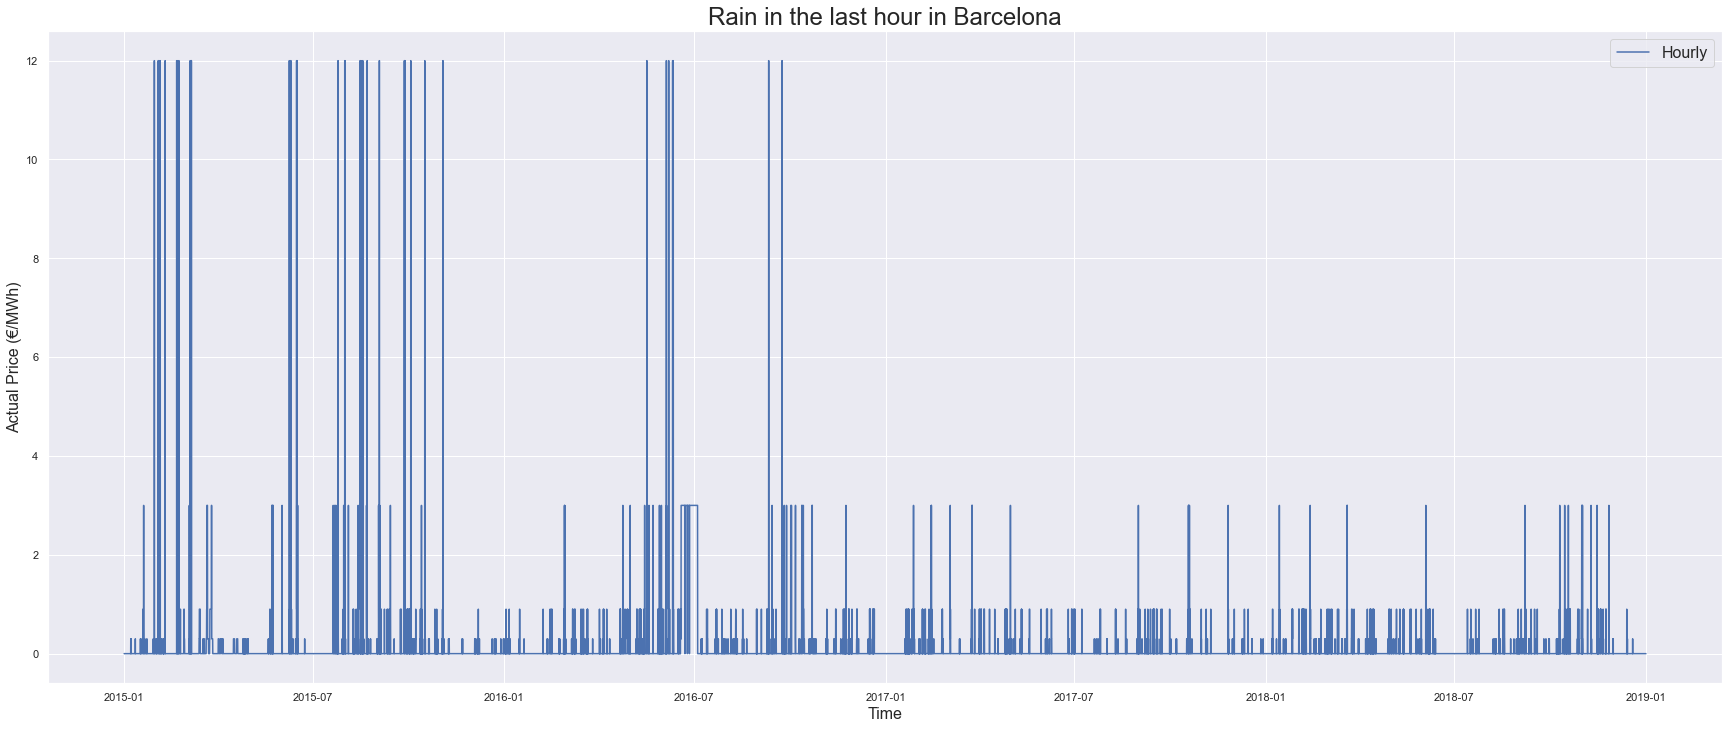

In [46]:
#绘制后1h降雨量trace
ax = plot_timeseries(total_df, 'rain_1h_Barcelona', 
                 label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Rain in the last hour in Barcelona')
plt.show()

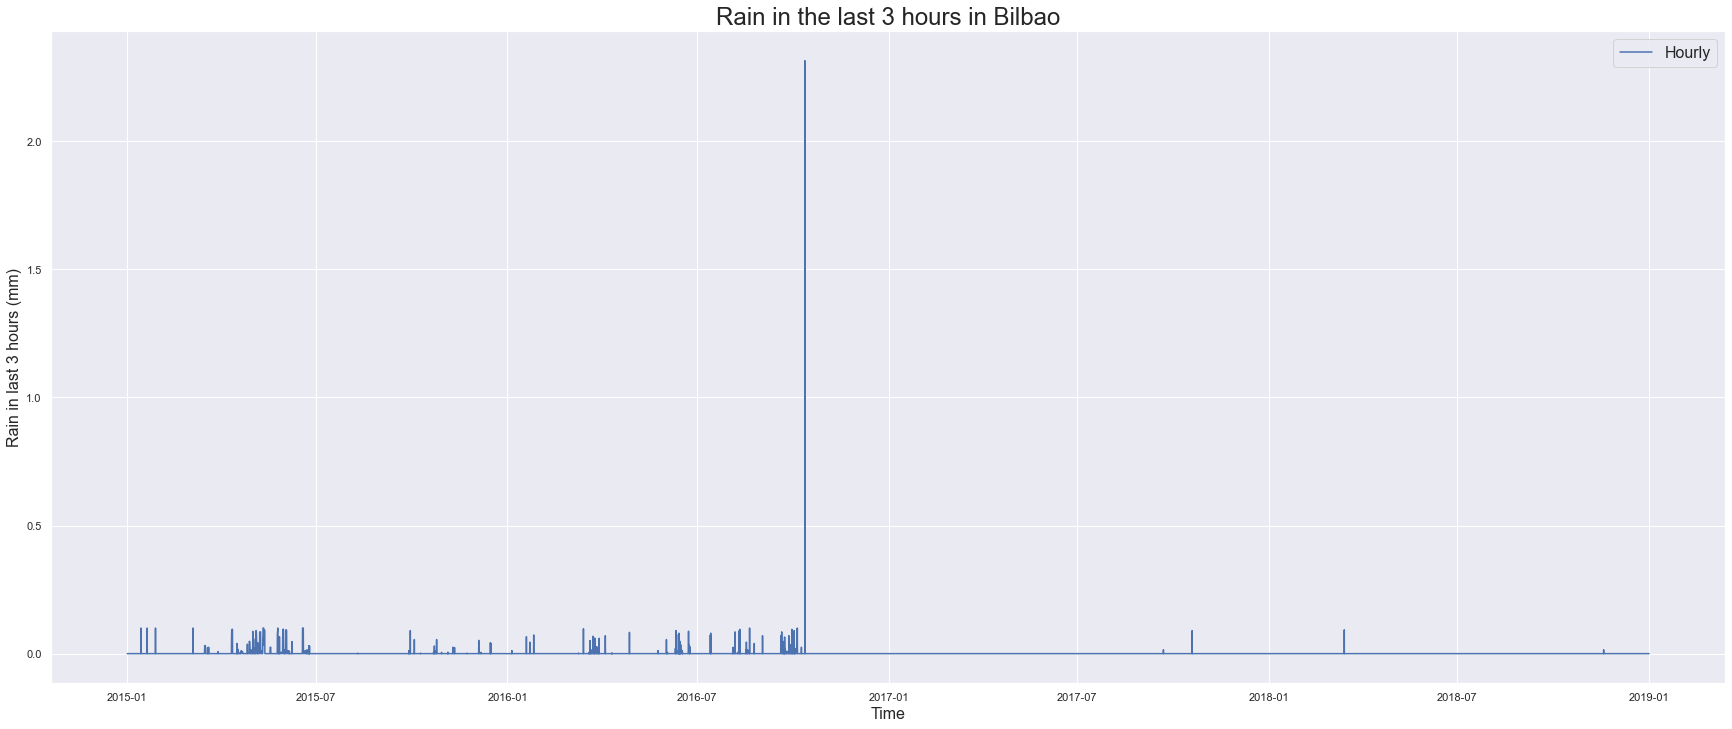

In [47]:
#绘制后3h降雨量trace.发现该数据并不可靠
ax = plot_timeseries(total_df, 'rain_3h_Bilbao', 
                 label='Hourly', ylabel='Rain in last 3 hours (mm)',
                 title='Rain in the last 3 hours in Bilbao')
plt.show()

In [48]:
#去除rain_3h数据
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    total_df = total_df.drop(['rain_3h_{}'.format(city)], axis=1)

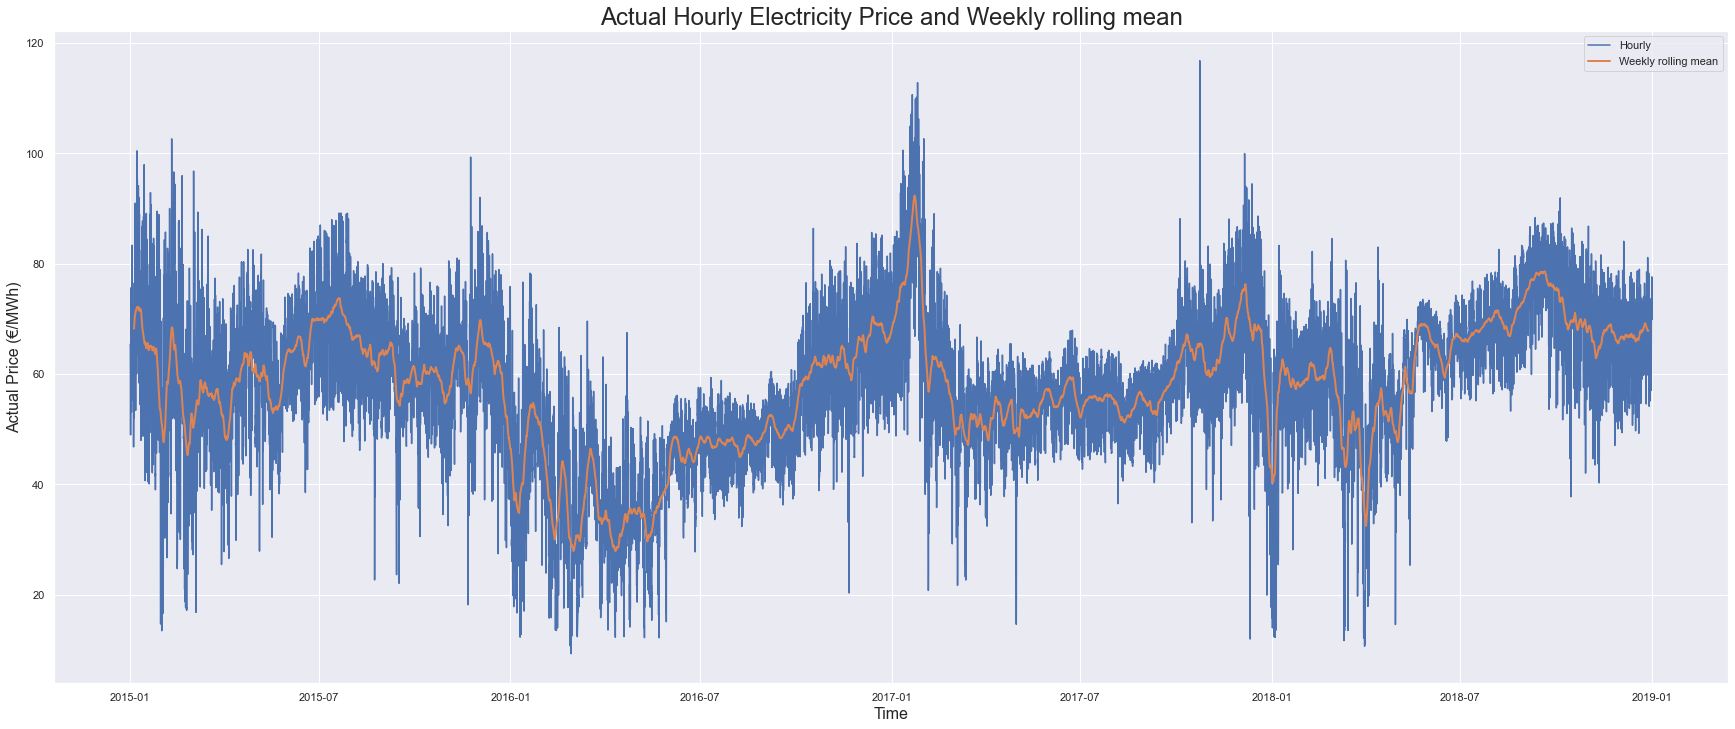

In [49]:
rolling = total_df['price actual'].rolling(24*7, center=True).mean()
ax = plot_timeseries(total_df, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.legend()
plt.show()

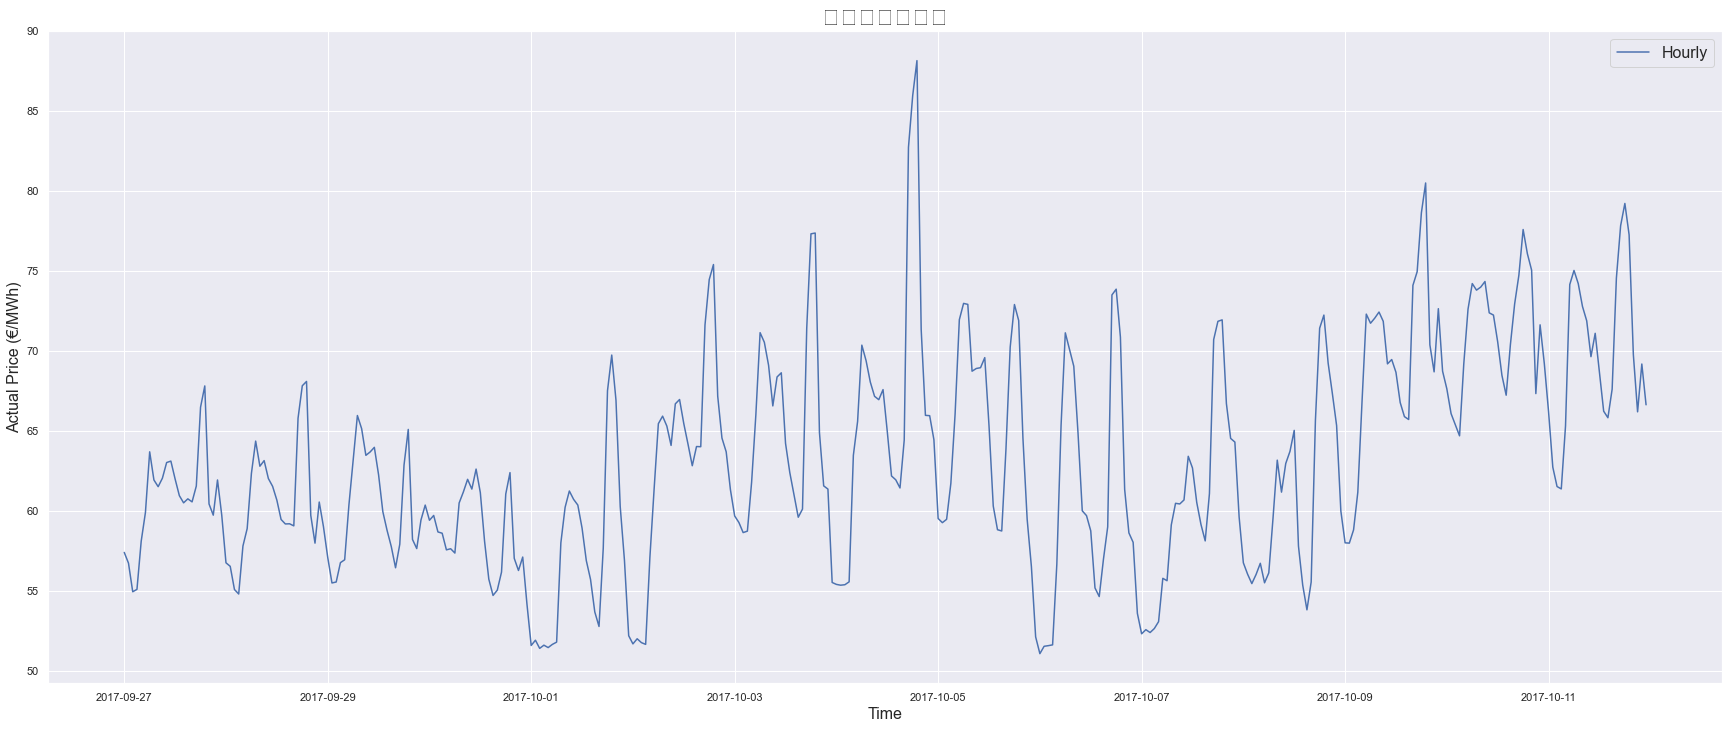

In [50]:
ax = plot_timeseries(total_df, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 start=1 + 24 * 1000, end=1 + 24 * 1015,
                 title='两周内电价数据')
plt.show()

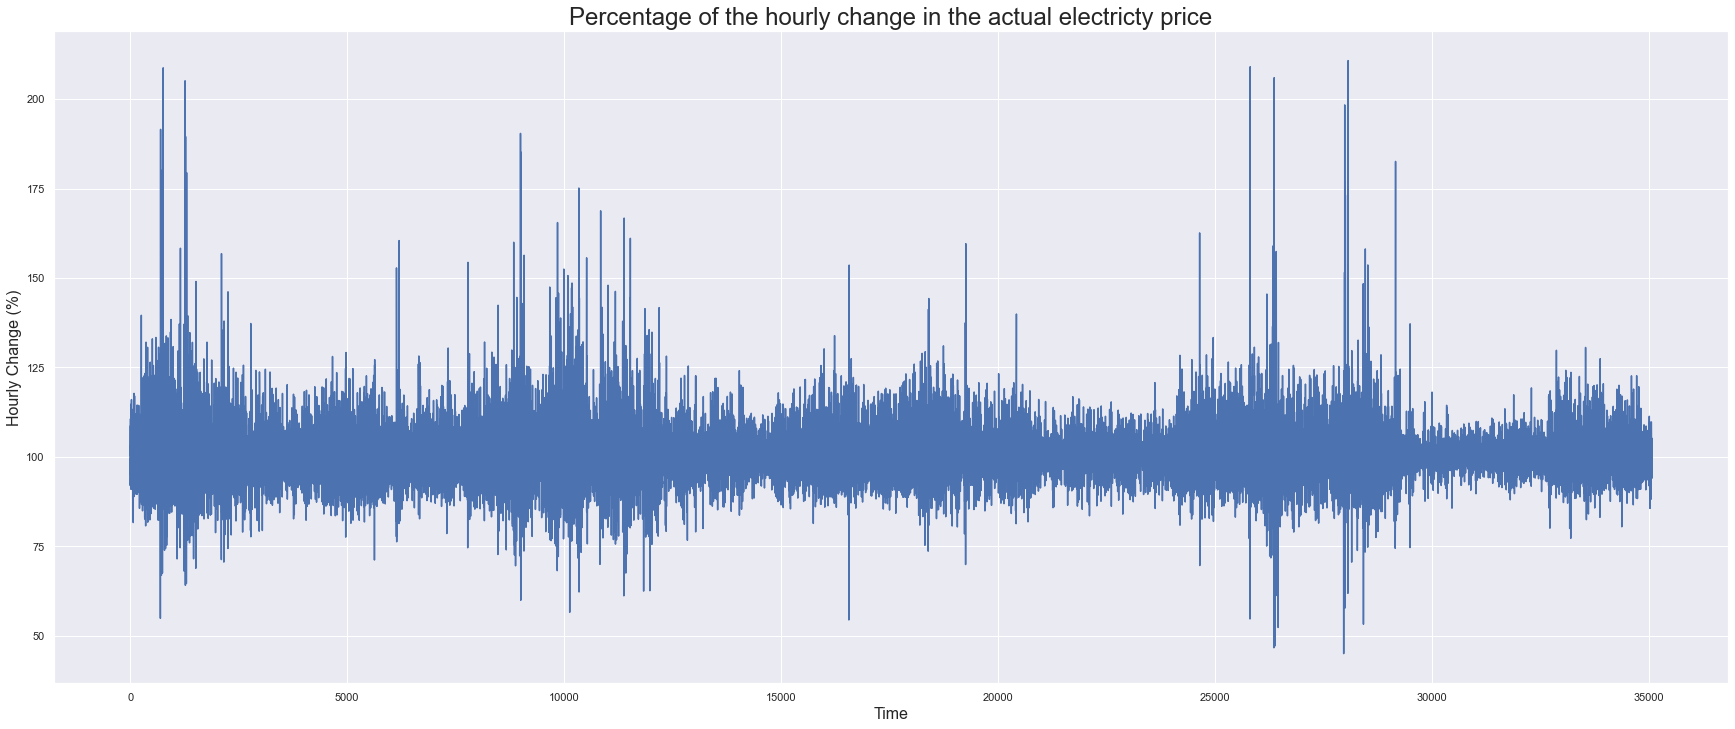

In [51]:
change = energy_df['price actual'].div(energy_df['price actual'].shift(1)).mul(100)
ax = plot_timeseries(series=change, ylabel='Hourly Change (%)', 
                 title='Percentage of the hourly change in the actual electricty price')
plt.show()

#### 时间序列分解

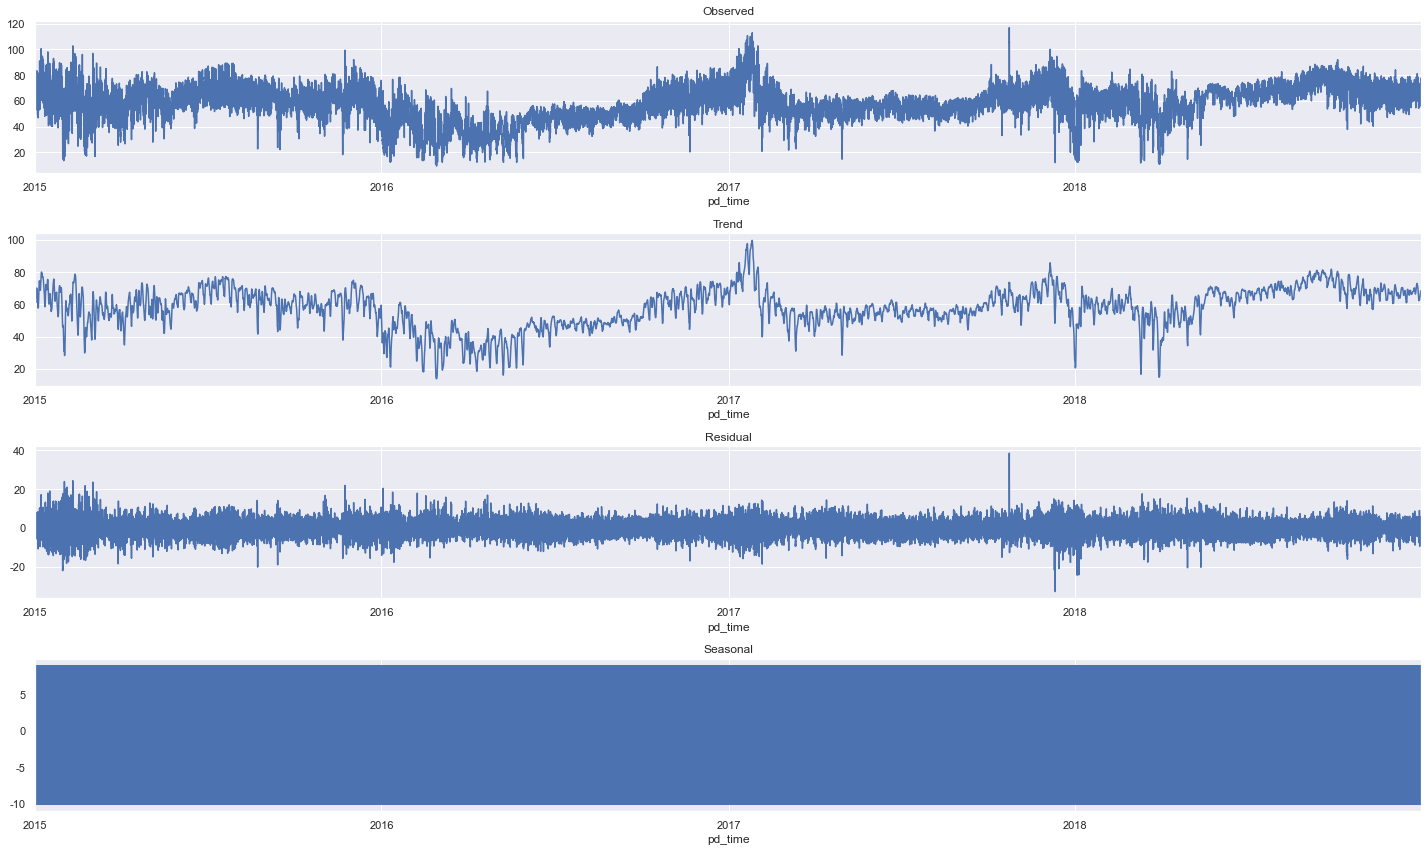

In [52]:
res = sm.tsa.seasonal_decompose(total_df['price actual'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

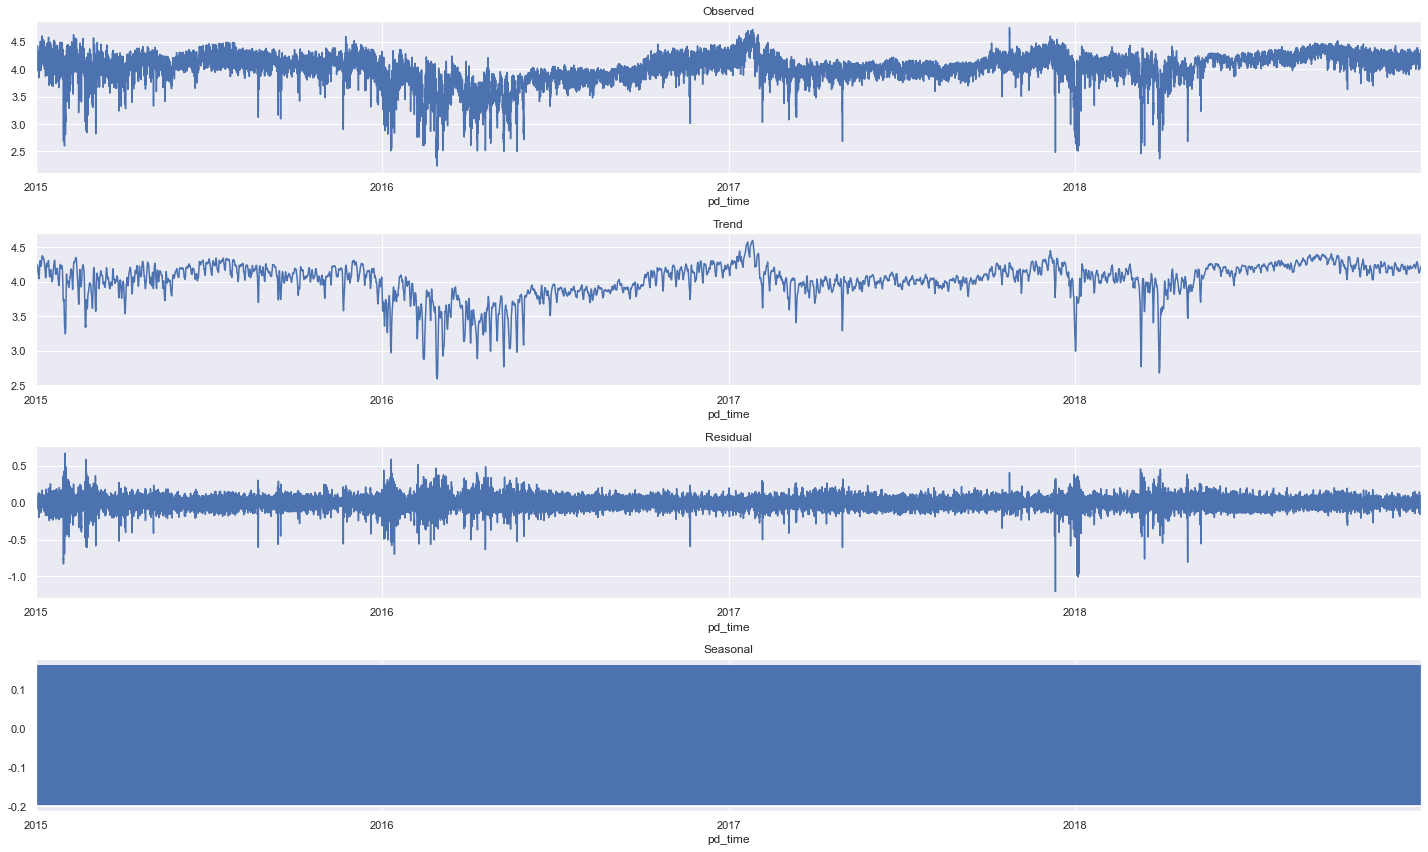

In [53]:
res = sm.tsa.seasonal_decompose(np.log(total_df['price actual']), model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

#### 单位根检验与平稳性检验

In [54]:
y = total_df['price actual']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -9.147016
p-value: 0.000000
#Lags used: 50
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814


In [55]:
kpss_test = kpss(y, regression='c', lags='legacy')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

KPSS Statistic: 7.957007
p-value: 0.010000
#Lags used: 52
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


#### acf与pacf图

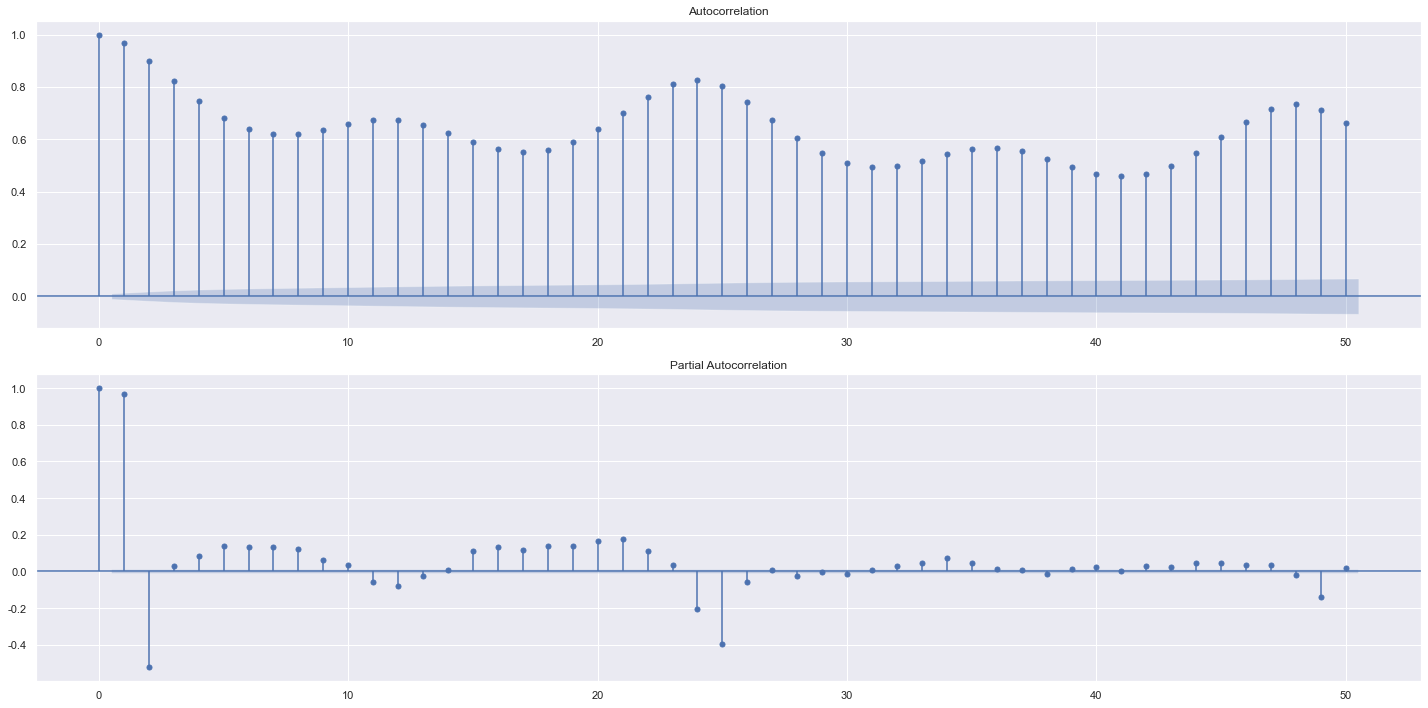

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10))
plot_acf(total_df['price actual'], lags=50, ax=ax1)
plot_pacf(total_df['price actual'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

#### 考察电价与总负荷之间的相关关系（相关性分析）

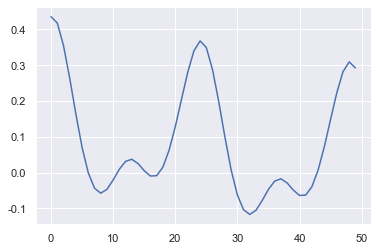

In [57]:
cross_corr = ccf(total_df['total load actual'], total_df['price actual'])
plt.plot(cross_corr[0:50])
plt.show()

In [58]:
#巴塞罗那和塞维利亚不下雪，故删去字段
total_df = total_df.drop(['snow_3h_Barcelona', 'snow_3h_Seville'], axis=1)

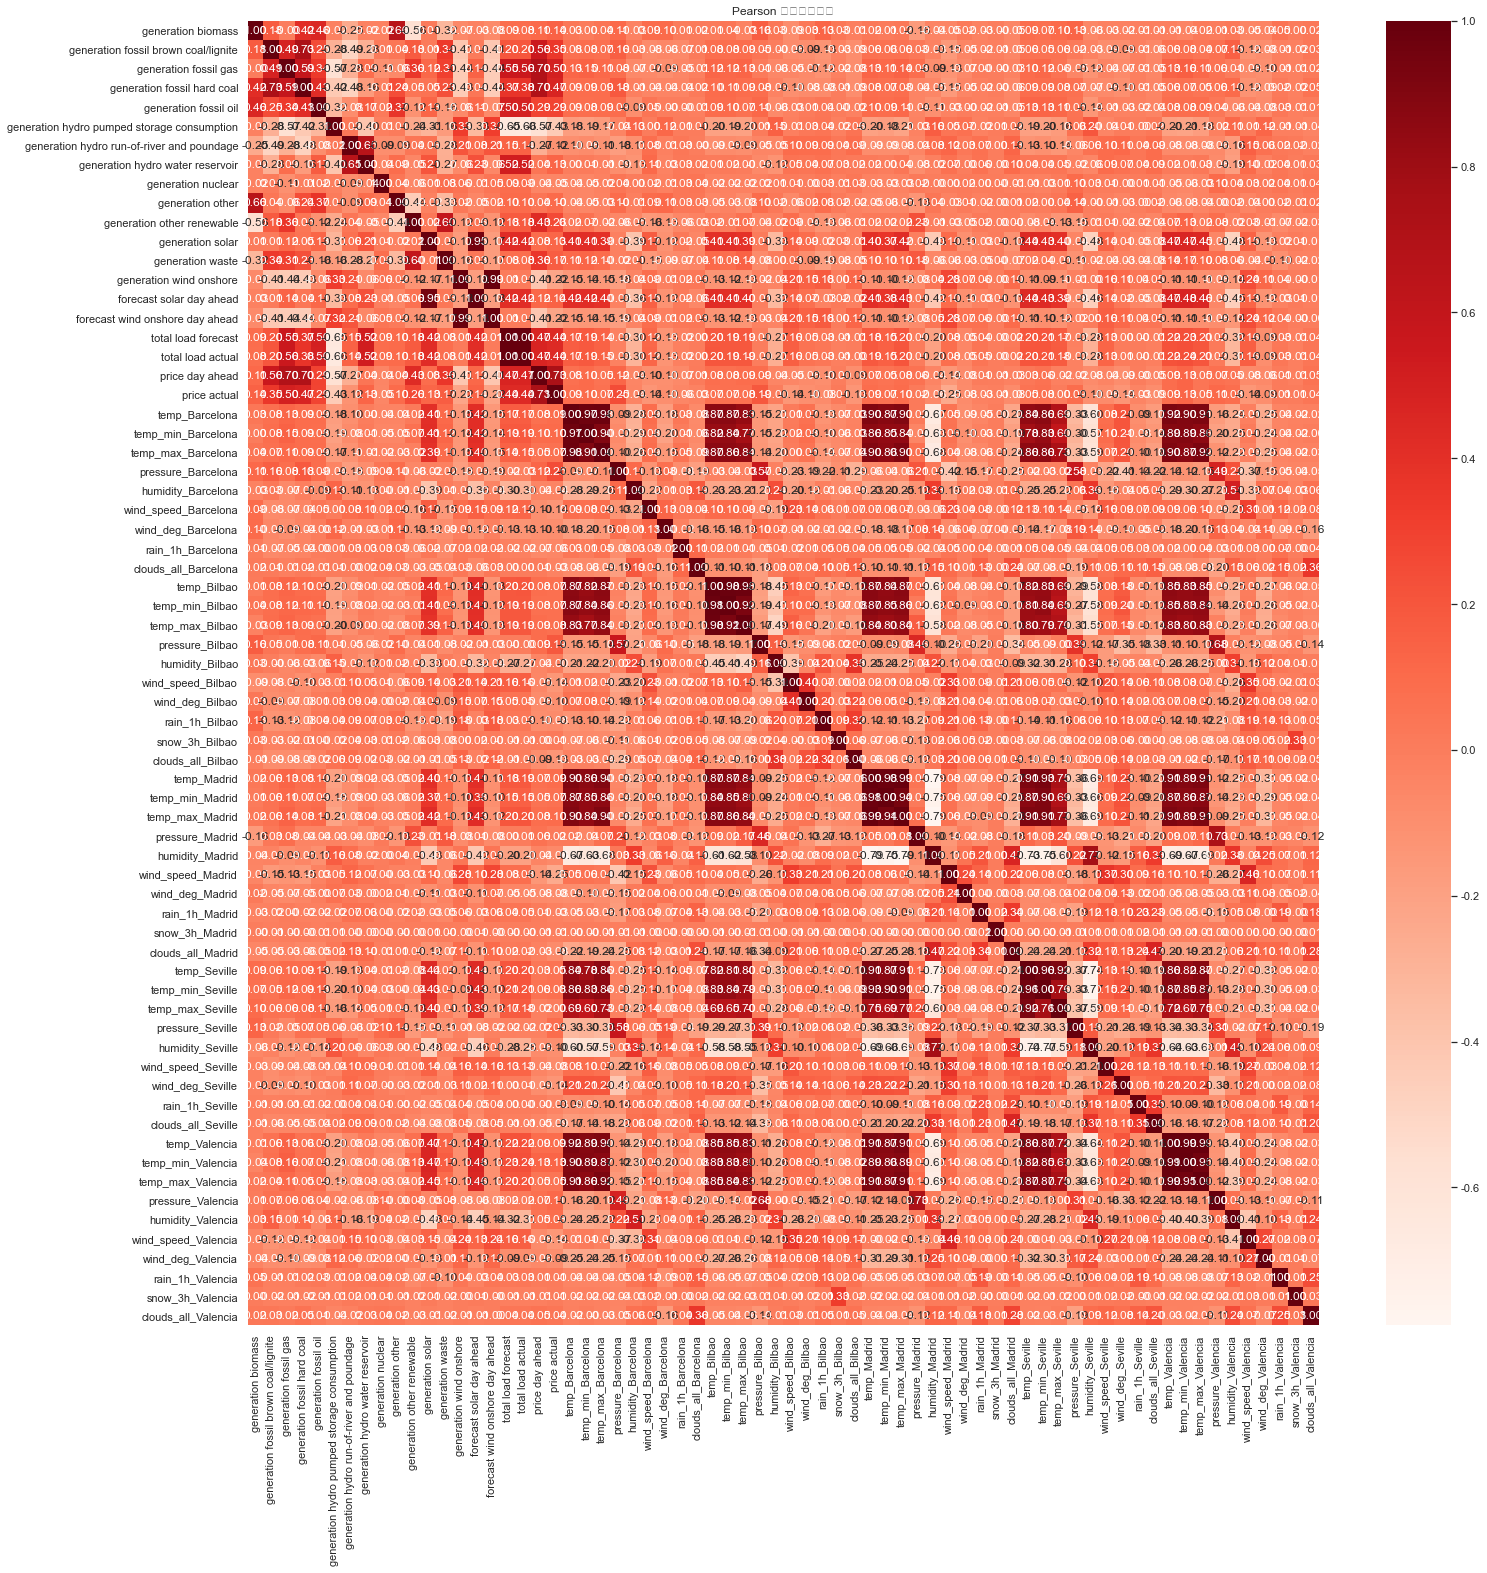

In [59]:
correlations = total_df.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f',cmap='Reds')
plt.title('Pearson 相关系数矩阵')
plt.show()

In [60]:
#标出相关性较高的变量
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

generation solar                 forecast solar day ahead           0.945735
generation wind onshore          forecast wind onshore day ahead    0.991147
forecast solar day ahead         generation solar                   0.945735
forecast wind onshore day ahead  generation wind onshore            0.991147
total load forecast              total load actual                  0.995096
total load actual                total load forecast                0.995096
temp_Barcelona                   temp_min_Barcelona                 0.970264
                                 temp_max_Barcelona                 0.976904
                                 temp_Bilbao                        0.866727
                                 temp_min_Bilbao                    0.867970
                                 temp_max_Bilbao                    0.828347
                                 temp_Madrid                        0.903996
                                 temp_min_Madrid                    0.874548

#### 定义用电峰期与谷期

In [61]:
for i in range(len(total_df)):
    position = total_df.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    year = position.year
    total_df.loc[position, 'hour'] = hour
    total_df.loc[position, 'weekday'] = weekday
    total_df.loc[position, 'month'] = month
    total_df.loc[position, 'year'] = year

In [62]:
for i in range(len(total_df)):
    position = total_df.index[i]
    hour = position.hour
    if ((hour > 8 and hour < 14) or (hour > 16 and hour < 21)):
        total_df.loc[position, 'business hour'] = 2
    elif (hour >= 14 and hour <= 16):
        total_df.loc[position, 'business hour'] = 1
    else:
        total_df.loc[position, 'business hour'] = 0

In [63]:
for i in range(len(total_df)):
    position = total_df.index[i]
    weekday = position.weekday()
    if (weekday == 6):
        total_df.loc[position, 'weekday'] = 2
    elif (weekday == 5):
        total_df.loc[position, 'weekday'] = 1
    else:
        total_df.loc[position, 'weekday'] = 0

#### 用温度与人口作为城市权重

In [64]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(total_df)):
    position = total_df.index[i]
    for city in cities:
        temp_max = total_df.loc[position, 'temp_max_{}'.format(city)]
        temp_min = total_df.loc[position, 'temp_min_{}'.format(city)]
        total_df.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)

马德里人口：3400000
巴塞罗那人口：1610000
瓦伦西亚人口：800000
塞维利亚人口：1300000
毕尔巴鄂人口：433000

In [65]:
total_pop = 3400000 + 1610000 + 800000 + 1300000 + 433000

weight_Madrid = 3400000 / total_pop
weight_Barcelona = 1610000 / total_pop
weight_Valencia = 800000 / total_pop
weight_Seville = 1300000 / total_pop
weight_Bilbao = 433000 / total_pop

In [66]:
cities_weights = {'Madrid': weight_Madrid, 
                  'Barcelona': weight_Barcelona,
                  'Valencia': weight_Valencia,
                  'Seville': weight_Seville,
                  'Bilbao': weight_Bilbao}
cities_weights

{'Madrid': 0.4507490388439613,
 'Barcelona': 0.21344292721728755,
 'Valencia': 0.10605859737504972,
 'Seville': 0.1723452207344558,
 'Bilbao': 0.05740421582924566}

In [67]:
for i in range(len(total_df)):
    position = total_df.index[i]
    temp_weighted = 0
    for city in cities:
        temp = total_df.loc[position, 'temp_{}'.format(city)]
        temp_weighted += temp * cities_weights.get('{}'.format(city))
    total_df.loc[position, 'temp_weighted'] = temp_weighted

#### 增加和能源、煤等有关的变量

In [68]:
total_df['generation coal all'] = total_df['generation fossil hard coal'] + total_df['generation fossil brown coal/lignite']

In [61]:
total_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,snow_3h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,snow_3h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia,hour,weekday,month,year,business hour,temp_range_Barcelona,temp_range_Bilbao,temp_range_Madrid,temp_range_Seville,temp_range_Valencia,temp_weighted,generation coal all
pd_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.657312,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0,23.0,0.0,12.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,271.887892,5150.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.763500,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0,0.0,0.0,1.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,271.893987,5083.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.251688,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0,1.0,0.0,1.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,271.317704,4904.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.203344,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0,2.0,0.0,1.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,271.314929,4385.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.485500,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0,3.0,0.0,1.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,271.331126,4027.0
.

#### 去除无关变量

In [69]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [70]:
train_end_idx = 30648
cv_end_idx = 34320
test_end_idx = 35064

In [71]:
X = total_df[total_df.columns.drop('price actual')].values
y = total_df['price actual'].values

y = y.reshape(-1, 1)

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

#### PCA

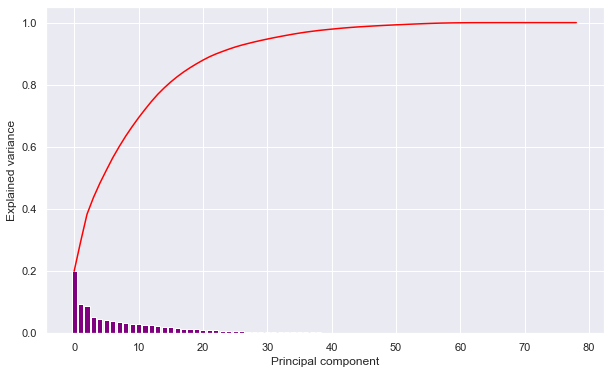

In [72]:
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])

num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_,color='purple')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='red')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [73]:
pca = PCA(n_components=0.90)
pca.fit(X_norm[:train_end_idx])
X_pca = pca.transform(X_norm)
X_pca.shape

(35064, 24)

In [74]:
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 0

X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=True)

X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=True)

X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history, 
                                   future_target, step=1, single_step=True)

In [112]:
X_train.shape

(30648, 0, 25)

#### 定义回归指标函数

In [75]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))*100
    return mape

def WMAPE(y_actual,y_pred):
    wmape = 100 * (np.abs(y_actual - y_pred).sum()) / (np.abs(y_actual).sum())
    return wmape

def result_df(y_actual,y_pred):
    
    r2=r2_score(y_actual,y_pred)
    mse=mean_squared_error(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    mae=mean_absolute_error(y_actual,y_pred)
    mape=MAPE(y_actual,y_pred)
    wmape=WMAPE(y_actual,y_pred)
    
    result=pd.DataFrame.from_dict({"r2":[r2],"MSE":[mse],"RMSE":[rmse],
                         "MAE":[mae],"MAPE":[mape],"WMAPE":[wmape]})
    return result

#### 模型建立

##### LightGBM

In [76]:

X_train_xgb = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_xgb = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_xgb = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)

In [83]:
def run_lgb(train_X, train_y, val_X, val_y,test_X,test_y):
    params = {
        "boosting_type":"dart",
        "objective": "regression",
        "metric": ["mape","rmse"],
        "num_iterations":30,
        "reg_lambda":100,
        "learning_rate":0.09
              
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model

y_pred,model=run_lgb(X_train_xgb,y_train,X_val_xgb,y_val,X_test_xgb,y_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 30624, number of used features: 600
[LightGBM] [Info] Start training from score 0.435734


In [81]:
X_trainval_xgb = np.concatenate((X_train_xgb, X_val_xgb), axis=0)
y_trainval = np.concatenate((y_train,y_val),axis=0)

In [87]:
params = {
    'boosting_type':'gbdt',#gbdt
    'objective': 'regression',
    'metric': ['mape','rmse'],
    "num_iterations":200,#26
    "feature_fraction":0.9,
    'learning_rate ': 0.01,
    "reg_lambda":300,
    "bagging_fraction":0.8,
    }
full_train=lgb.Dataset(X_train_xgb,y_train)
model=lgb.train(params,full_train,num_boost_round=10,verbose_eval=10)

[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Unknown parameter: 0.01
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 30624, number of used features: 600
[LightGBM] [Info] Start training from score 0.435734


In [88]:
pred_train=model.predict(X_trainval_xgb)
result_df(y_trainval,pred_train)

y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_pred_inv

result_df(y_test_inv,y_pred_inv)

,r2,MSE,RMSE,MAE,MAPE,WMAPE
0,0.872247,6.83367,2.614129,2.117102,3.088767,3.154765


In [135]:
pred_train=model.predict(X_trainval_xgb)
result_df(y_trainval,pred_train)

,r2,MSE,RMSE,MAE,MAPE,WMAPE
0,0.940801,0.001042,0.032283,0.023237,inf,5.165075


In [136]:
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_pred_inv

array([[60.82299342],
       [57.0414982 ],
       [53.80200409],
       [51.10053763],
       [51.14765389],
       [53.2911248 ],
       [54.14580495],
       [54.41859898],
       [54.18479012],
       [54.06634018],
       [58.66875577],
       [63.03326255],
       [62.84162553],
       [61.68340369],
       [64.43686097],
       [63.88317522],
       [60.99649905],
       [62.81472828],
       [66.74607887],
       [69.93588201],
       [69.45762594],
       [69.2660652 ],
       [67.34377916],
       [65.10426179],
       [61.60510614],
       [52.03668365],
       [50.55907302],
       [49.68914034],
       [51.47167967],
       [53.69602959],
       [54.85435766],
       [59.55451077],
       [66.59889142],
       [68.92283948],
       [69.24859947],
       [70.54416107],
       [71.02273598],
       [71.01435493],
       [69.47226225],
       [67.68882773],
       [68.78501382],
       [70.51659947],
       [71.94113361],
       [75.07131722],
       [73.98588839],
       [71

In [137]:
result_df(y_test_inv,y_pred_inv)

,r2,MSE,RMSE,MAE,MAPE,WMAPE
0,0.871162,6.891685,2.625202,2.146347,3.132548,3.198344


#### XGBoost

In [128]:
param = {'eta': 0.03, 'max_depth': 180, 
         'subsample': 1.0, 'colsample_bytree': 0.95, 
         'alpha': 0.1, 'lambda': 0.15, 'gamma': 0.1,
         'objective': 'reg:linear', 'eval_metric': 'rmse', 
         'silent': 1, 'min_child_weight': 0.1, 'n_jobs': -1}

dtrain = xgb.DMatrix(X_train_xgb, y_train)
dval = xgb.DMatrix(X_val_xgb, y_val)
dtest = xgb.DMatrix(X_test_xgb, y_test)
eval_list = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(param, dtrain, 180, eval_list, early_stopping_rounds=3)

[17:25:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:0.14168	eval-rmse:0.09920
[1]	train-rmse:0.13764	eval-rmse:0.09640
[2]	train-rmse:0.13373	eval-rmse:0.09369
[3]	train-rmse:0.12994	eval-rmse:0.09106
[4]	train-rmse:0.12627	eval-rmse:0.08852
[5]	train-rmse:0.12272	eval-rmse:0.08605
[6]	train-rmse:0.11928	eval-rmse:0.08366
[7]	train-rmse:0.11595	eval-rmse:0.08134
[8]	train-rmse:0.11271	eval-rmse:0.07914
[9]	train-rmse:0.10958	eval-rmse:0.07699
[10]	train-rmse:0.10655	eval-rmse:0.07492
[11]	train-rmse:0.10362	eval-rmse:0.07289
[12]	train-rmse:0.10078	eval-rmse:0.07093
[13]	train-rmse:0.09803	eval-rmse:0.0

In [131]:
forecast = xgb_model.predict(dtest)
xgb_forecast = forecast.reshape(-1, 1)

xgb_forecast_inv = scaler_y.inverse_transform(xgb_forecast)

rmse_xgb = math.sqrt(mean_squared_error(y_test_inv, xgb_forecast_inv))
print('RMSE of hour-ahead electricity price XGBoost forecast: {}'
      .format(round(rmse_xgb, 3)))

result_df(y_test_inv, xgb_forecast_inv)

RMSE of hour-ahead electricity price XGBoost forecast: 1.878


,r2,MSE,RMSE,MAE,MAPE,WMAPE
0,0.93408,3.526119,1.877796,1.416459,2.139213,2.110713


In [141]:
y_test_invpd = pd.DataFrame(y_test_inv)
y_pred_xgb = pd.DataFrame(xgb_forecast_inv)

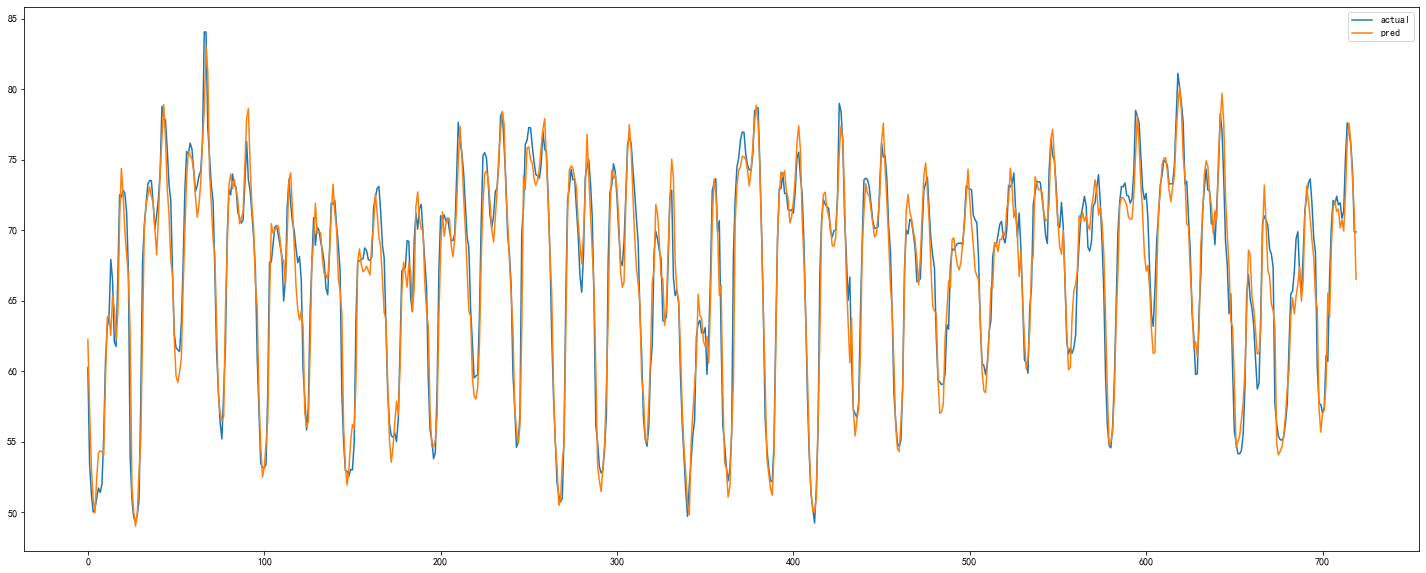

In [142]:
pred_df=pd.concat([y_test_invpd,y_pred_xgb],axis=1)
pred_df.columns = ["actual","pred"]

pred_df[["actual","pred"]].plot(figsize=(25,10));

#### 绘制真实值与预测值的序列轨迹对比

In [143]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=pred_df.actual,
                   mode='lines',
                   name='test'))
fig.add_trace(go.Scatter(y=pred_df.pred,
                   mode='lines',
                   name='pred'))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title='Prediction Result',
                  xaxis_title='Date',
                  yaxis_title='Production')
fig.show()

#### 绘制特征重要性柱状图

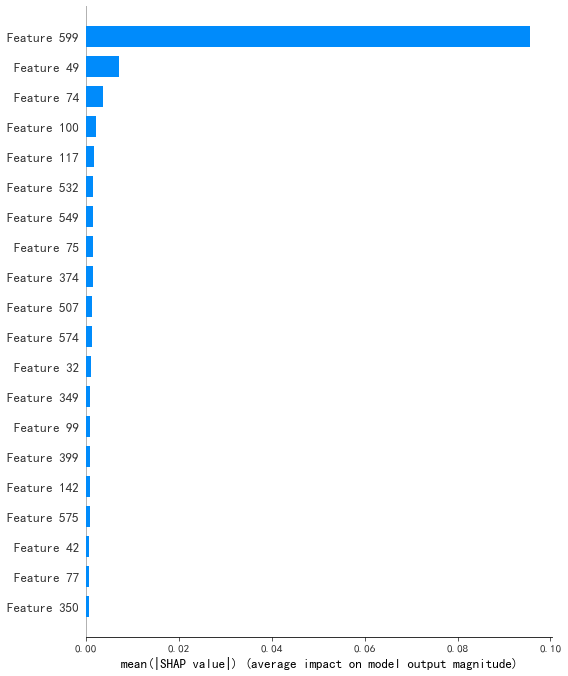

In [146]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test_xgb)

shap.summary_plot(shap_values,X_test_xgb, plot_type="bar")